<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

Try a variety of response variables. Start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
print( boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [7]:
# Boston data is from SKlearn and it is clean

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [8]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
predictors = ['CRIM', u'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, 
                                            train_size=0.5, random_state=8)

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/juan/.envs/DAT21/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.6635575722188751

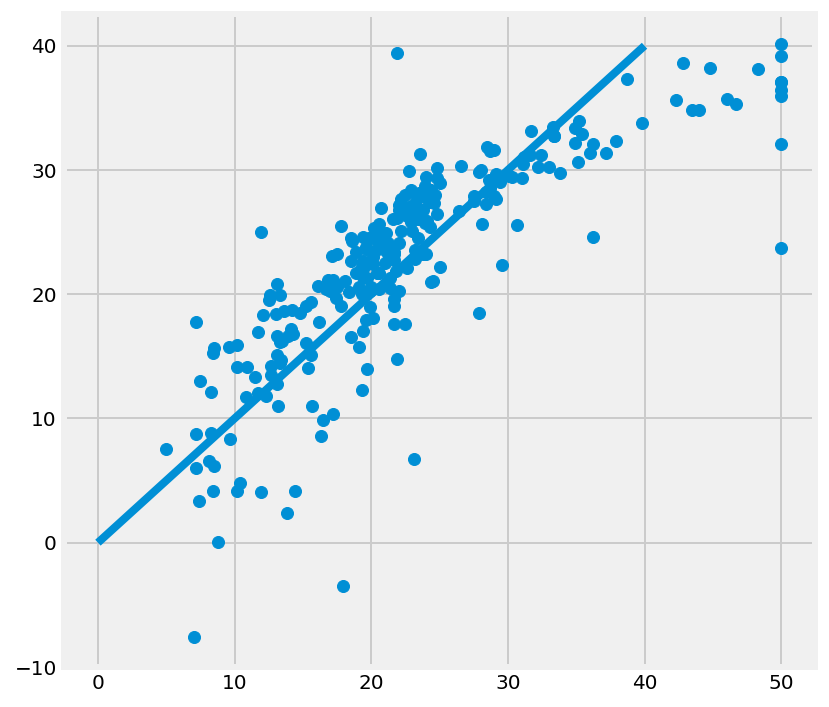

In [10]:
yhat = lr.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X[predictors],
                                    y, train_size=0.7, random_state=8)

lr1 = LinearRegression()

lr1.fit(X_train,y_train)

lr1.score(X_test, y_test)

/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.6161800060984306

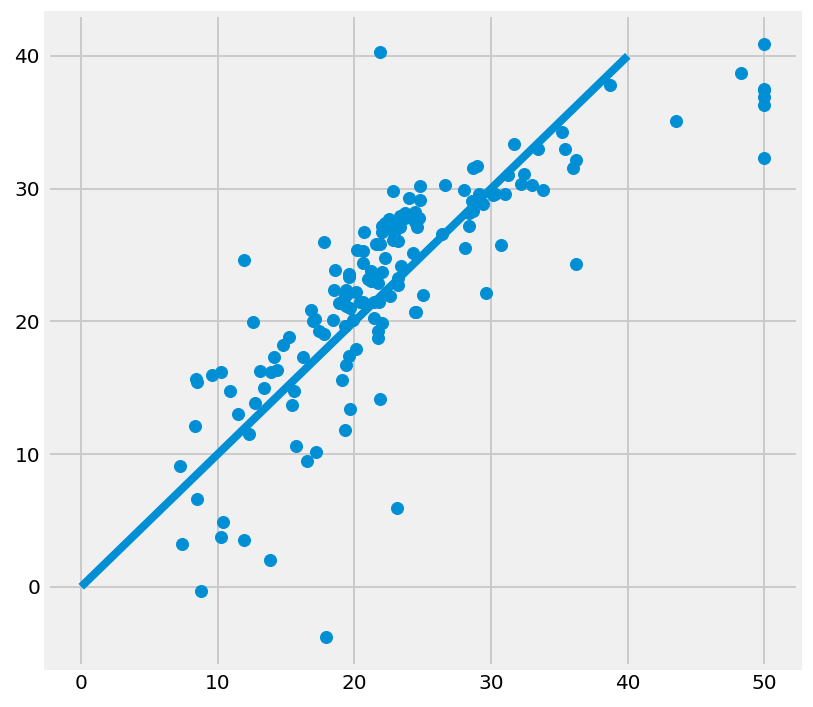

In [12]:
yhat = lr1.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[predictors], 
                                    y, train_size=0.9, random_state=8)

lr2 = LinearRegression()

lr2.fit(X_train,y_train)

lr2.score(X_test, y_test)

/Users/juan/.envs/DAT21/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.5839244756380986

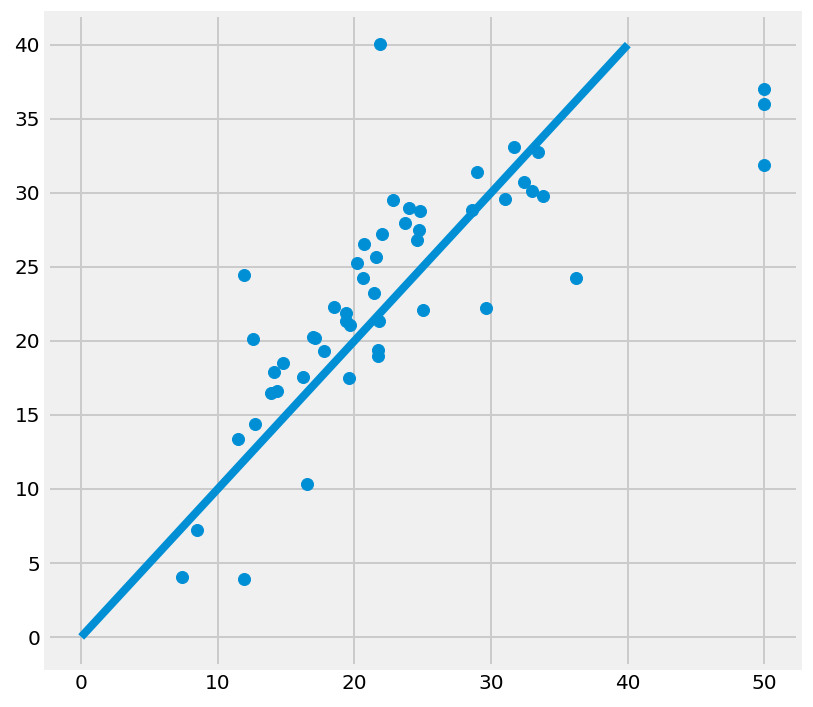

In [14]:
yhat = lr2.predict(X_test)
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot([0,40],[0,40])
plt.show()

### 4. Try K-Fold cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print( '------------------------------------\n')
    print( 'K:', folds)
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print( "Cross-validated scores:", scores)
    print( "Mean CV R2:", np.mean(scores))
    print( 'Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print( "Cross-Predicted R2:", r2)


------------------------------------

K: 5
Cross-validated scores: [ 0.64631693  0.70482771  0.44121527  0.08620083 -0.50525881]
Mean CV R2: 0.27466038569253415
Std CV R2: 0.4460278043775152
Cross-Predicted R2: 0.5173431725227886
------------------------------------

K: 6
Cross-validated scores: [ 0.60617609  0.70748062  0.52005295  0.6187581  -0.31575052 -0.22205816]
Mean CV R2: 0.3191098469909209
Std CV R2: 0.4201818237155471
Cross-Predicted R2: 0.4798654514852613
------------------------------------

K: 7
Cross-validated scores: [ 0.6551403   0.59539945  0.53563504  0.49472098  0.24503727 -0.64989835
  0.11581191]
Mean CV R2: 0.28454951390640415
Std CV R2: 0.4216307788617276
Cross-Predicted R2: 0.43146848335882704
------------------------------------

K: 8
Cross-validated scores: [ 0.67247147  0.61771501  0.68493632  0.61008211  0.58758257 -0.28401756
 -1.07692607  0.03328161]
Mean CV R2: 0.23064068275696606
Std CV R2: 0.5954371664928623
Cross-Predicted R2: 0.5805843328702183
------

### 5. [Bonus] Optimize the $R^2$ score

Can you optimize your $R^2$ by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [18]:
from itertools import combinations

In [19]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [20]:
len(combs)

8191

In [21]:
combs[100]

('CRIM', 'ZN', 'B')

In [22]:
# how to calculate the amount of possible combinations
from scipy.misc import comb
sum([comb(13,i) for i in range(1,14)])

/Users/juan/.envs/DAT21/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


8191.0

In [24]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print( i)
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [25]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [26]:
for i in range(5):
    print( results[i])

(('ZN', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.5045148383236395)
(('ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'), 0.502766999579532)
(('NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5015393804361498)
(('ZN', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.5010547381193206)
(('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'), 0.4986836730120587)


### 5.1 Can you explain what could be wrong with this approach?

Even though we are cross-validating to get our R2 score for each model we're testing, 
we're trying thousands of different models and then choosing the one that has the
absolute highest R2.
Cross-validation does not eliminate the fact that this is a random sample from an
overall population, and the highest R2 out of these models is likely going to be 
higher than the ones near it by chance. Is the model with the best R2 *REALLY* 
better than the 2nd highest? 3rd highest?

This is an important point: you are the researcher and you should, whenever possible,
NOT rely on the computer's "brute force". This is why EDA is so important as well
as domain knowledge. As a human being can we eliminate variables that we know 
should not be used to build the model?